<a href="https://colab.research.google.com/github/arvind-22/colab/blob/main/ML_Python_Boston_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this End to End Machine Learning problem, we will work through the following steps:

* Problem Definition (Boston house price data).
* Loading the Dataset.
* Analyze Data (some skewed distributions and correlated attributes).
* Evaluate Algorithms (Linear Regression looked good).
* Evaluate Algorithms with Standardization (KNN looked good).
* Algorithm Tuning (K=3 for KNN was best).
* Ensemble Methods (Bagging and Boosting, Gradient Boosting looked good).
* Tuning Ensemble Methods (getting the most from Gradient Boosting).
* Finalize Model (use all training data and confirm using validation dataset).

**Boston House Price dataset**

The attributes are defined as follows (taken from the UCI Machine Learning Repository1):
1. **CRIM**: per capita crime rate by town
2. **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**: proportion of non-retail business acres per town
4. **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX**: nitric oxides concentration (parts per 10 million)
6. **RM**: average number of rooms per dwelling
7. **AGE**: proportion of owner-occupied units built prior to 1940
8. **DIS**: weighted distances to five Boston employment centers
9. **RAD**: index of accessibility to radial highways
10. **TAX**: full-value property-tax rate per $10,000

11. **PTRATIO**: pupil-teacher ratio by town
12. **B**: 1000(Bk - 0:63)2 where Bk is the proportion of blacks by town
13. **LSTAT**: % lower status of the population
14. **MEDV**: Median value of owner-occupied homes in $1000s

In [2]:
#Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
#from pandas.plotting.scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [4]:
## Load dataset
filename = 'housing.data.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)

In [5]:
#shape
print(dataset.shape)

(506, 14)


In [6]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [7]:
# head
print(dataset.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

In [8]:
#Summarize distribution of each attribute
# descriptions
set_option('precision', 1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [9]:
# Now, let's now take a look at the correlation between all of the numeric attributes.
set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

We can see that many of the attributes have a strong correlation (e.g.> 0:70 or < -0:70). **For example**:
* NOX and INDUS with 0.77.
* DIS and INDUS with -0.71.
* TAX and INDUS with 0.72.
* AGE and NOX with 0.73.
* DIS and NOX with -0.78.

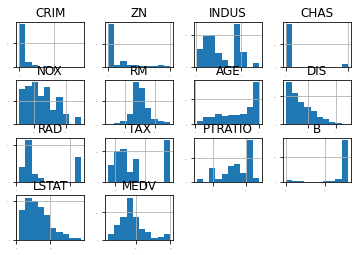

In [10]:
# Data Visualizations
#unimodal Data Visualization - Histogram
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

We can see that some attributes may have an exponential distribution, such as **CRIM, ZN, AGE and B**. We can see that others may have a bimodal distribution such as **RAD and TAX**.

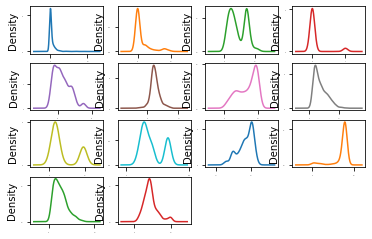

In [11]:
# Let's look at the same distributions using density plots
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
pyplot.show()

It also looks like **NOX, RM and LSTAT** may be skewed Gaussian distributions,which might be helpful later with transforms.

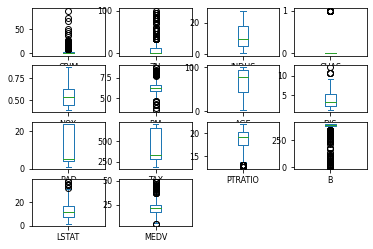

In [12]:
# Let's look at the data with box and whisker plots of each attribute.
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

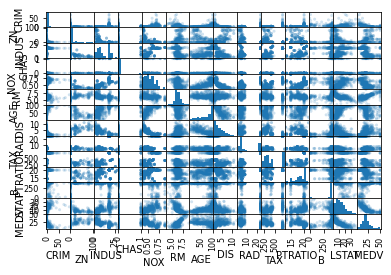

In [16]:
# Let's look at some visualizations of the interactions between variables.
# Multimodal Data Visualization
import pandas as pd
pd.plotting.scatter_matrix(dataset, alpha=0.2)
pyplot.show()

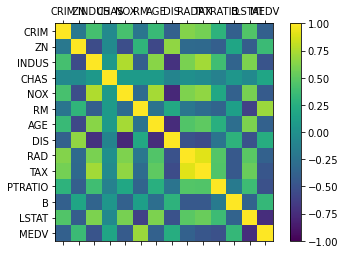

In [17]:
# Let's also visualize the correlations between the attributes.
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

**DATA TRANSFORMATION**

It would be worth trying:
* Feature selection and removing the most correlated attributes.
* Normalizing the dataset to reduce the effect of differing scales.
* Standardizing the dataset to reduce the effects of differing distributions.

In [18]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [19]:
# We will evaluate algorithms using the Mean Squared Error (MSE) metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

We will select a suite of dierent algorithms capable of working on this regression problem. The six algorithms selected include:
* **Linear Algorithms**: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).
* **Nonlinear Algorithms**: Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [20]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [24]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -29.105107 (21.503969)
SVR: -67.824705 (32.801530)


It looks like **LR** has the lowest MSE, followed by LASSO & EN.

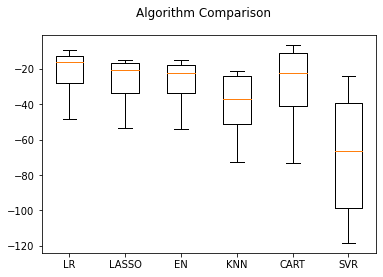

In [25]:
# Let's take a look at the distribution of scores across all cross validation folds
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [27]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -27.979947 (19.425183)
ScaledSVR: -29.570433 (18.052964)


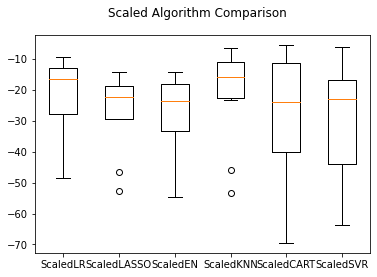

In [28]:
# Let's take a look at the distribution of the scores across the cross validation folds.
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

We can see that **KNN** has both a tight distribution of error and has the lowest score.

The default value for the number of neighbors in KNN is 7. We can use a grid search to try a set of dierent numbers of neighbors and see if we can improve the score.

In [30]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [32]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': 1}
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


You can see that the best for **k (n neighbors) is 1** providing a mean squared error of -19.497829, the best so far.

**ENSEMBLE METHODS**

In this section we will evaluate four dierent ensemble machine learning algorithms, two boosting and two bagging methods:
* **Boosting Methods**: AdaBoost (AB) and Gradient Boosting (GBM).
* **Bagging Methods**: Random Forests (RF) and Extra Trees (ET).

In [33]:
#ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: -15.214449 (7.390495)
ScaledGBM: -10.978469 (8.618177)
ScaledRF: -12.940914 (9.486013)
ScaledET: -9.475650 (6.973746)


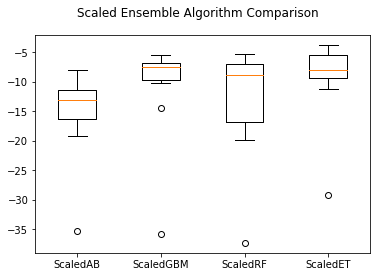

In [34]:
# We can also plot the distribution of scores across the cross validation folds.
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

It looks like **Extra Trees** has a better mean score, it also looks like **Gradient Boosting**  has a similar distribution and perhaps a better median score.

In [36]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [37]:
# Print Performance of Tuned GBM on Scaled Dataset.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.560638 using {'n_estimators': 400}
-11.629999 (8.833221) with: {'n_estimators': 50}
-11.073455 (8.772155) with: {'n_estimators': 100}
-10.838924 (8.734377) with: {'n_estimators': 150}
-10.785568 (8.657244) with: {'n_estimators': 200}
-10.654778 (8.540552) with: {'n_estimators': 250}
-10.649385 (8.497232) with: {'n_estimators': 300}
-10.589337 (8.413596) with: {'n_estimators': 350}
-10.560638 (8.353747) with: {'n_estimators': 400}


We can see that the best configuration was **n estimators=400** resulting in a mean squared error of **-10.560638**.

In [38]:
## Finalize Model
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

In [39]:
# We can then scale the inputs for the validation dataset and generate predictions.
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.902132586880027


We can see that the estimated mean squared error is **11.8**, close to our estimate of -10.56